## 그래프 요약[함수]

> [함수설명] onepop_mean_plt(막대개수,데이터프레임)

> 막대개수는 히스토그램 빈 개수, 나무상자 그림 출력

In [0]:
def onepop_mean_plt(bin,df):
  import matplotlib.pyplot as plt
  plt.subplot(1,2,1)
  n, bins, patches = plt.hist(df,bin, density=True, facecolor='orange', alpha=0.75)
  plt.axvline(x=df.mean(),color='blue',linestyle='--',lw=0.7)
  plt.axvline(x=df.quantile(0.5),color='red',linestyle='--',lw=0.7)
  plt.title('Histogram (mean=%.2f, sd=%.3f)' % (df.mean(),df.std()))
  plt.grid(True)
  plt.subplot(1,2,2)
  plt.title('boxplot')
  plt.boxplot(df,notch=True)
  plt.show()

## 숫자요약 [함수]
>[함수설명] onepop_mean_stat(데이터시리즈)

>> 표본크기, 평균, 표준편차
>> 순서통계량 최소값, 제1사분위, 중앙값, 제3사분위, 최대값, 범위, 사분위범위

In [0]:
def onepop_mean_stat(df):
  res=df.describe()
  print('*** Sample size=%4d Mean=%.3f SD=%.4f \n*** 최소값=%.3f 1사분위=%.3f 중앙값=%.3f 제3사분위=%.3f 최대값=%.3f 범위=%.3f 사분위범위(IQR)=%.3f' 
        %(res[0],res[1],res[2],res[3],res[4],res[5],res[6],res[7],res[7]-res[3],res[6]-res[4]))

## (1-alpha)*100% 신뢰구간 구하기[함수]

> xbar +- t(자유도=n-1,(1-alpha))*sd/sqrt(n), xbar=표본평균, sd=표본표준편차, n=표본크기

> 함수 t.ppf(1-alpha,df=n-1)

[함수설명] onepop_mean_ci(유의수준,데이터시리즈)

In [0]:
def onepop_mean_ci(alpha,df):
  from scipy.stats import t
  import numpy as np
  res=df.describe()
  lb=res[1]-t.ppf(1-alpha,df=res[0]-1)*res[2]/np.sqrt(res[0])
  ub=res[1]+t.ppf(1-alpha,df=res[0]-1)*res[2]/np.sqrt(res[0])
  print('모평균 추정치=%.3f, 모평균 %2d%% 신뢰구간 : 하한=%.3f, 상한=%.3f' % (res[1],(1-alpha)*100,lb,ub))

[함수설명] 통계량이 주어진 경우 onepop_mean_ci0(유의수준,n,xbar,sd)

In [0]:
def onepop_mean_ci0(alpha,n,xbar,sd):
  from scipy.stats import t
  import numpy as np
  lb=xbar-t.ppf(1-alpha,df=n-1)*sd/np.sqrt(n)
  ub=xbar+t.ppf(1-alpha,df=n-1)*sd/np.sqrt(n)
  print('모평균 추정치=%.3f, 모평균 %2d%% 신뢰구간 : 하한=%.3f, 상한=%.3f' % (xbar,(1-alpha)*100,lb,ub))

## 가설검정[함수]

> 귀무가설 : 모집단 평균은 mu0이다. mu=mu0 

> 대립가설 : 모집단 평균은 mu0보다 크다. mu!=mu0 (양측가설)

>> mu>mu0, mu<mu0 (단측가설)

> 검정통계량 : (xbar - mu0)/(sd/sqrt(n)) ~ t(자유도=n-1), xbar=표본평균, sd=표본표준편차, n=표본크기

In [0]:
def onepop_mean_ht(alpha,mu0,side,df):
  from scipy.stats import t
  import numpy as np
  res=df.describe()
  ts=(res[1]-mu0)/(res[2]/np.sqrt(res[0]))
  if side==2:
    p=(1-t.cdf(abs(ts),res[0]-1))*2
  else:
    p=1-t.cdf(abs(ts),res[0]-1)
  if p<0.05:
    print('hat(u)=%.3f sd=%.4f test statistics=%.3f pvalues=%.4f (Reject H0)' % (res[1],res[2],ts, p))
  else:
    print('hat(u)=%.3f sd=%.4f test statistics=%.3f pvalues=%.4f (Accept H0)' % (res[1],res[2],ts, p))

[통계량이 주어진 경우]

In [0]:
def onepop_mean_ht0(alpha,mu0,side,n,xbar,sd):
  from scipy.stats import t
  import numpy as np
  ts=(xbar-mu0)/(sd/np.sqrt(n))
  if side==2:
    p=(1-t.cdf(abs(ts),n-1))*2
  else:
    p=1-t.cdf(abs(ts),n-1)
  if p<0.05:
    print('hat(u)=%.3f sd=%.4f test statistics=%.3f pvalues=%.4f (Reject H0)' % (xbar,sd,ts, p))
  else:
    print('hat(u)=%.3f sd=%.4f test statistics=%.3f pvalues=%.4f (Accept H0)' % (xbar,sd,ts, p))

## 이상치 진단 및 삭제[함수]
> [함수설명] extrem(데이터시리즈)

> 출력 결과 : 상한, 하한 극단값 출력

> DF=extrem() -> DF에는 극단치 제거된 데이터시리즈 있음
 

In [0]:
def extrem(df):
  Q1=df.quantile(.25)
  Q3=df.quantile(.75)
  out_up=df[df>Q3+1.5*(Q3-Q1)]
  out_dn=df[df<Q1-1.5*(Q3-Q1)]
  print('상한 극단치 \n',out_up,'\n 하한 극단치 \n',out_dn)
  return df[(df>Q1-1.5*(Q3-Q1))&(df<Q3+1.5*(Q3-Q1))]



---



## 치우침 진단

> (필요 이유) 표본 크기가 작은 경우 모집단의 분포가 치우침이 큰 경우 - 데이터가 충분히 큰 경우에는 문제 없음

> (진단방법)=정규성 검정 Anderson Darling 검정통계량 / Shapiro Wilks 방법

> 귀무가설 : 표본 데이터는 정규분포를 따른다.

> 대립가설 : 표본데이터는 정규분포를 따르지 않는다.

(치우침 해결방법) (우로 치우침) 제곱근 > 로그변환 > -1/X (좌로 치우침) X^2 > X^3

http://wolfpack.hnu.ac.kr/Stat_Notes/elem_stat/Stat_methods/정규변환.pdf

Tukey Power 변환 : X^lambda/(1-lambda)

Box Cox 변환 : (X^lambda-1)/(lambda)

[함수 설명] chk_norm(데이터시리즈) -> 출력결과 (정규성 만족-통계량, 유의확률)
> 정규성 만족하지 않으면 최적 lambda(lam)와 정규변환 데이터(xt)

In [0]:
def chk_norm(df):
  from scipy.stats import shapiro
  stat, p = shapiro(df)
  if p<0.05:
    print('Statistics=%.3f, p=%.3f (Not Normal)' % (stat, p))
    xt,lbm=stats.boxcox(df) #box-cox transformation / xt transformed data
    print('lambda=%.2f'% lbm)
    return (xt, lbm)
  else:
    print('Statistics=%.3f, p=%.3f (Normal)' % (stat, p))

## [예제 데이터]

> 기업 CEO 성별, 은행 대출 이자율, 기업형태(personal, partner, corporation), 매출액(백만불), 기업설립연수(년)

> 1053 기업(확률 층화추출 - 층화변수 CEO 성별 남녀) 표본조사

[분석]
> 시나리오 : 작년 은행이 기업에 준 대출 이자율 평균이 1.38%이었다.

> 경기 부양을 위하여 기업 대출 이자율을 낮추었다고 은행이 발표하였다. 사실인가?

In [2]:
import pandas as pd
bank=pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/example_data/bank.csv')
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 5 columns):
gender      1053 non-null object
rate        1053 non-null float64
biz_type    1053 non-null object
sales       1053 non-null int64
found_yr    1053 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 41.2+ KB


###[순서1] 그래프 요약

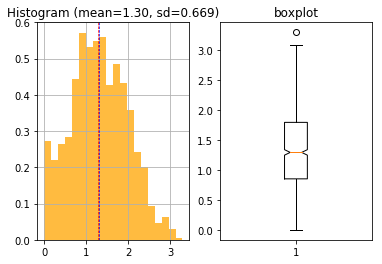

In [7]:
onepop_mean_plt(20,bank.rate)

###[순서2] 숫자요약

In [0]:
onepop_mean_stat(bank.rate)

*** Sample size=1053 Mean=1.303 SD=0.6690 
*** 최소값=0.000 1사분위=0.850 중앙값=1.290 제3사분위=1.790 최대값=3.290 범위=3.290 사분위범위(IQR)=0.940


[숫자요약 결과] 대출이자 0인 기업이 있어 이를 제거하고 추정하는 것이 적절함

> 데이터 클린징

In [0]:
bank0=bank[bank.rate>0]
onepop_mean_stat(bank0.rate)

*** Sample size=1022 Mean=1.343 SD=0.6388 
*** 최소값=0.010 1사분위=0.872 중앙값=1.310 제3사분위=1.800 최대값=3.290 범위=3.280 사분위범위(IQR)=0.928


###[순서3] 95% 신뢰구간 구하기

In [0]:
onepop_mean_ci(0.05,bank0.rate)

모평균 추정치=1.343, 모평균 95% 신뢰구간 : 하한=1.310, 상한=1.376


In [0]:
onepop_mean_ci0(0.05,1022,1.343,0.6388)   #statistic given, 올림으로 다소 차이 있을 수 있음

모평균 추정치=1.343, 모평균 95% 신뢰구간 : 하한=1.310, 상한=1.376


### [순서4] 모평균 가설검정

> 귀무가설 : 모집단 평균은 1.38%이다.

>> (예제) 작년 평균 대출 이자율 1.37%에 비해 올해 감소하였나? mu0=1.38

> 대립가설 : 모집단 평균은 1.38%보다 작다. mu<mu0 (하한 단측가설)

In [0]:
from scipy import stats
stats.ttest_1samp(bank0.rate,1.38) #양측검정을 위한 p-값 제안

Ttest_1sampResult(statistic=-1.8568646990566782, pvalue=0.06361825147036242)

In [0]:
onepop_mean_ht(0.05,1.38,1,bank0.rate)

hat(u)=1.343 sd=0.6388 test statistics=-1.857 pvalues=0.0318 (Reject H0)


In [0]:
onepop_mean_ht0(0.05,1.38,1,1022,1.343,0.6388)  #statistic given, 올림으로 다소 차이 있을 수 있음

hat(u)=1.343 sd=0.6388 test statistics=-1.852 pvalues=0.0322 (Reject H0)


###[순서5] 이상치 진단 

In [0]:
bank_clean=extrem(bank0.rate) #극단치 제거된 데이터가 df_clean에 저장됨

상한 극단치 
 439    3.29
Name: rate, dtype: float64 
 하한 극단치 
 Series([], Name: rate, dtype: float64)


In [0]:
bank_clean.shape  # 이상치 제거 데이터

(1021,)

In [0]:
onepop_mean_ht(0.05,1.38,1,bank_clean)

hat(u)=1.341 sd=0.636 test statistics=-1.959 pvalues=0.0252 (Reject H0)


###[정규성진단 및 해결]

In [0]:
bank_tr, lbm=chk_norm(bank_clean)

Statistics=0.990, p=0.000 (Not Normal)
lambda=0.75


In [0]:
bank_tr

array([ 0.60805972, -0.11157551,  0.12800777, ...,  1.25473964,
       -0.1425873 ,  0.35518071])